In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import os
import re
import requests
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold                                                  
from sklearn import preprocessing
from sklearn.metrics import classification_report ,consensus_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

###  Reading the dataset

In [2]:
data=pd.read_csv(r'C:\Users\Sharare\Desktop\poroje 2\train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
Mobile_df=pd.DataFrame(data)
Mobile_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
Mobile_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
Mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
Mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Plot

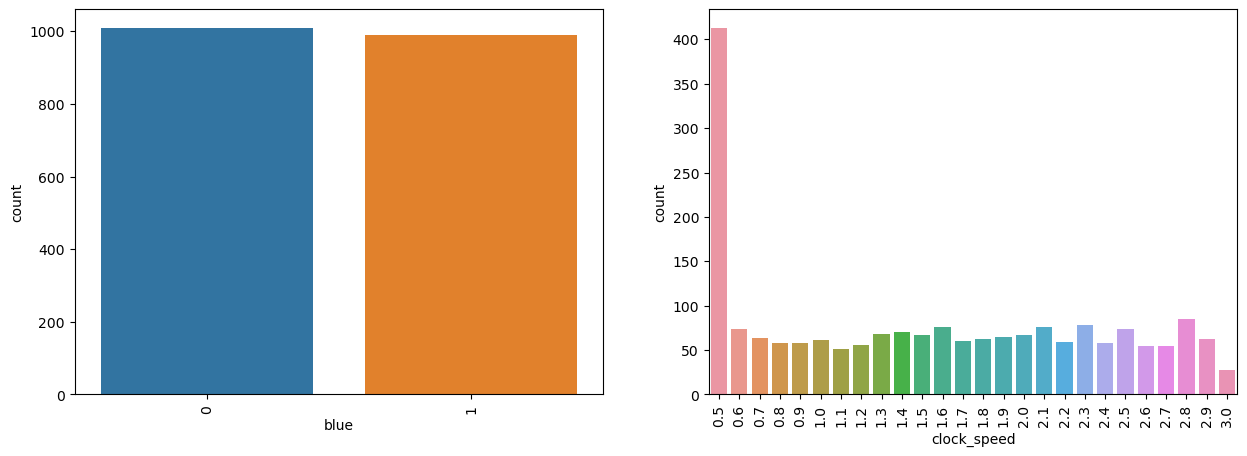

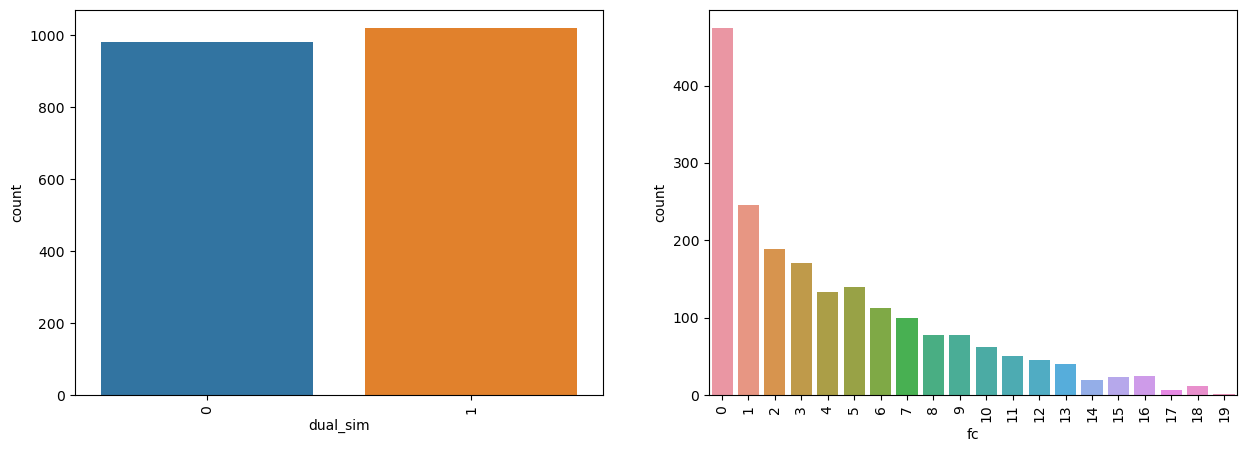

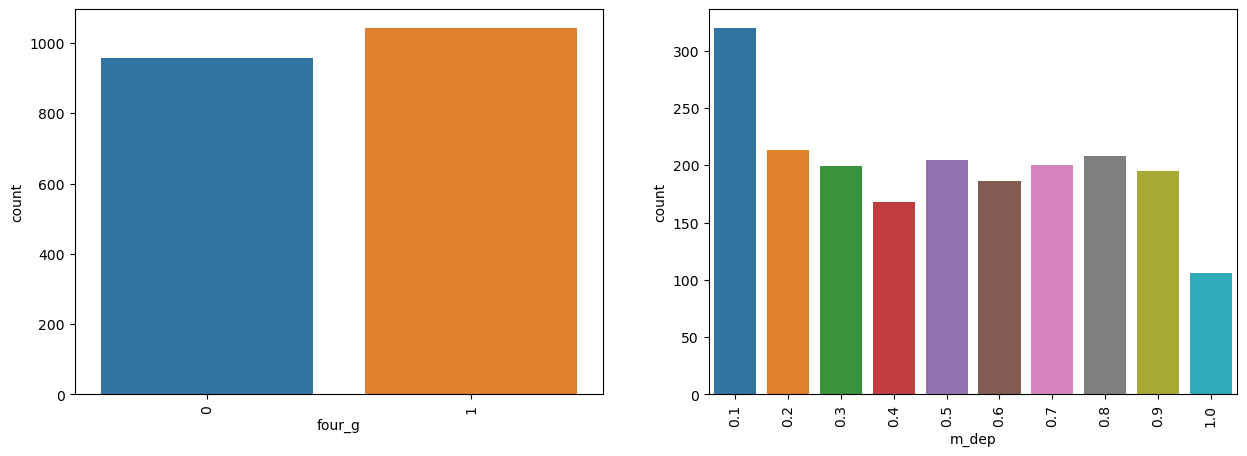

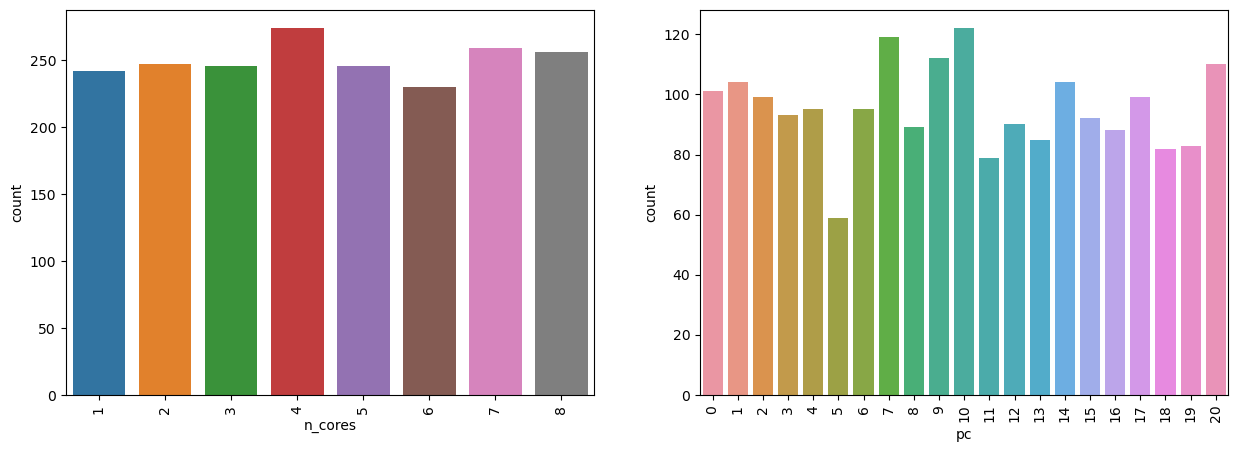

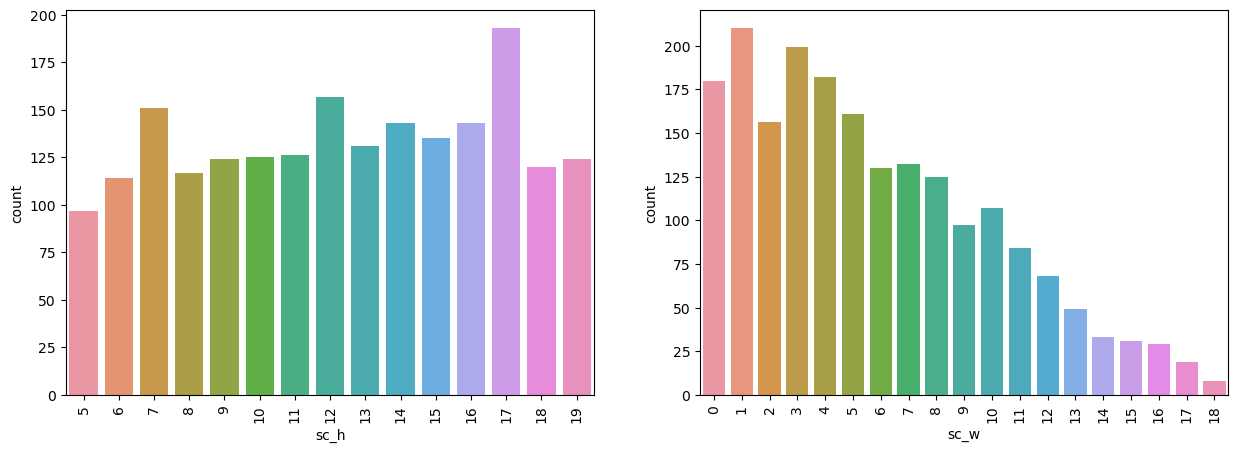

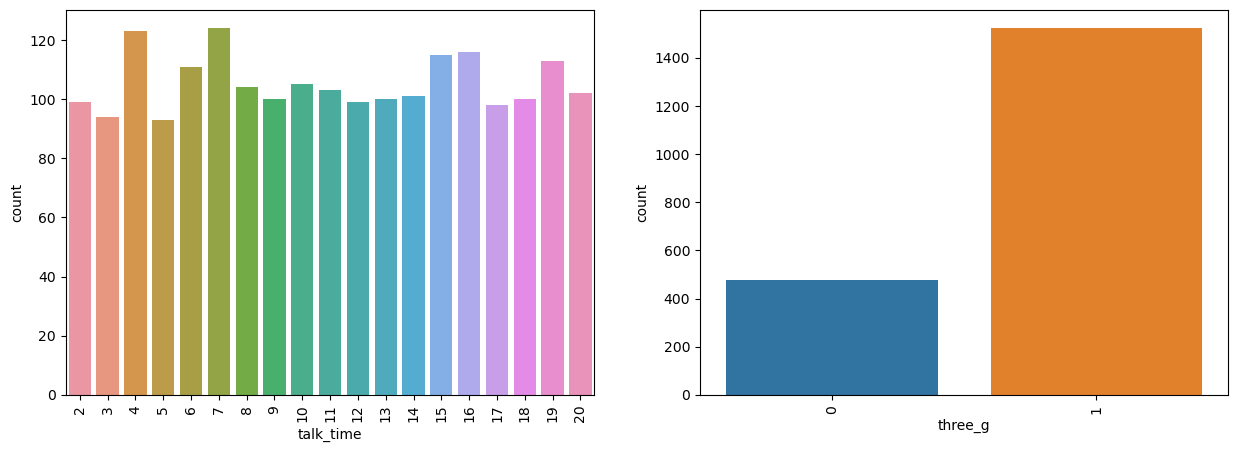

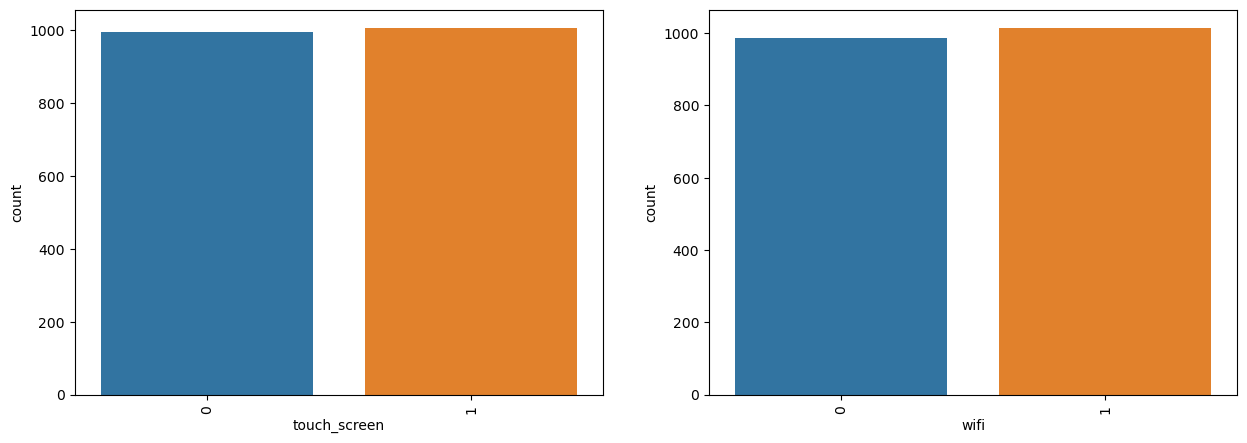

In [7]:
#Categorical features for count plot
C=[ 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g'
   , 'm_dep','n_cores', 'pc', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']

i=0
while i<14:
    fig=plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    plt.xticks(rotation=90)
    sns.countplot(x=C[i], data=Mobile_df)
    i +=1
    plt.subplot(1,2,2)
    plt.xticks(rotation=90)
    sns.countplot(x=C[i], data=Mobile_df)
    i +=1
    plt.show()

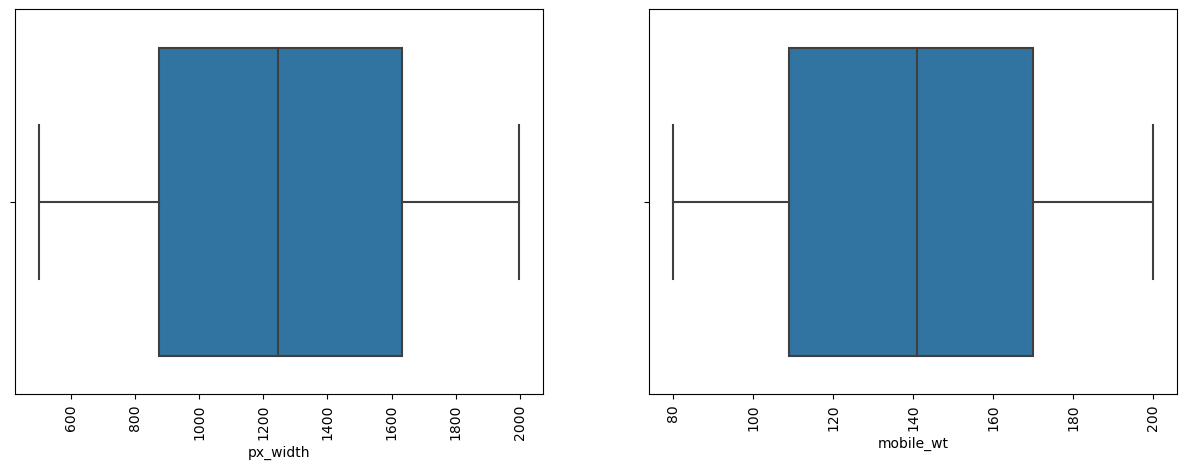

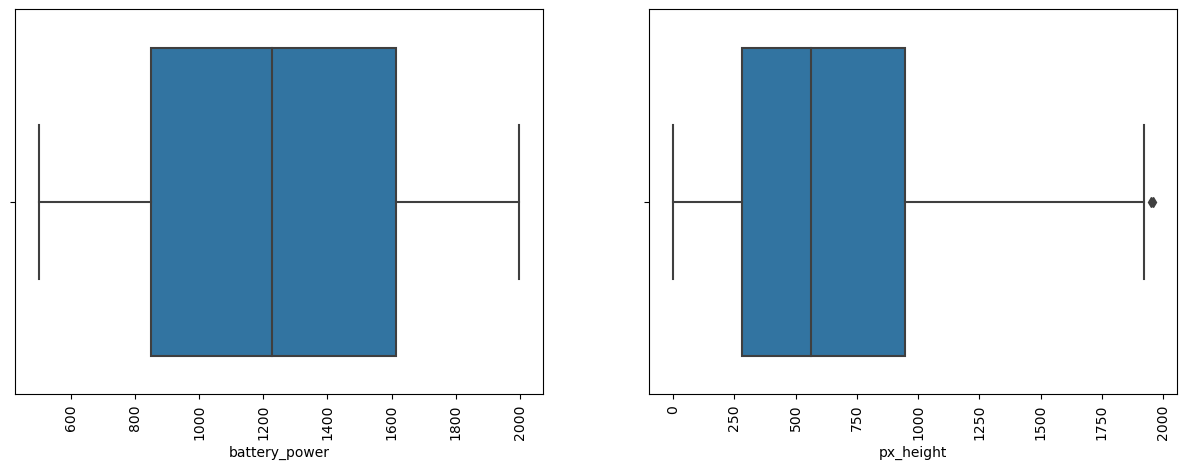

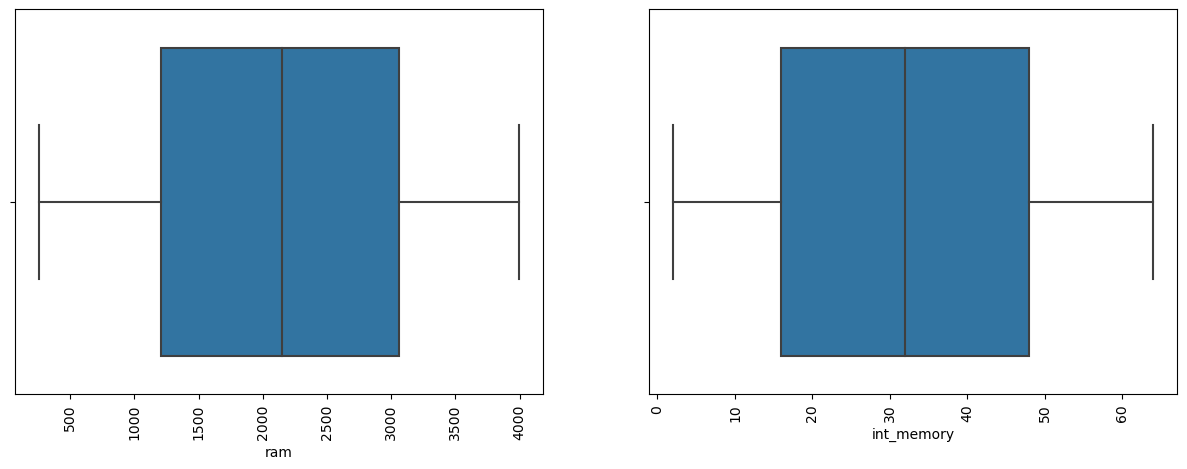

In [8]:
# Numeric features for box plot
C = ['px_width', 'mobile_wt','battery_power','px_height','ram','int_memory']



i = 0
while i <5:
    fig = plt.figure(figsize=[15, 5])
    
    plt.subplot(1, 2, 1)
    plt.xticks(rotation=90)
    sns.boxplot(x=C[i], data=Mobile_df)
    
    i += 1
    
    plt.subplot(1, 2, 2)
    plt.xticks(rotation=90)
    sns.boxplot(x=C[i], data=Mobile_df)
    
    i += 1
    
    plt.show()

## Pearson correlation matrix

In [9]:
pear_corr=Mobile_df.corr(method='pearson')
pear_corr.style.background_gradient(cmap='Blues')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [10]:
Mobile_df.corr()['price_range'].sort_values(ascending=False)[1:]

ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

Text(0.5, 1.0, 'Correlation between Attributes and Price Range')

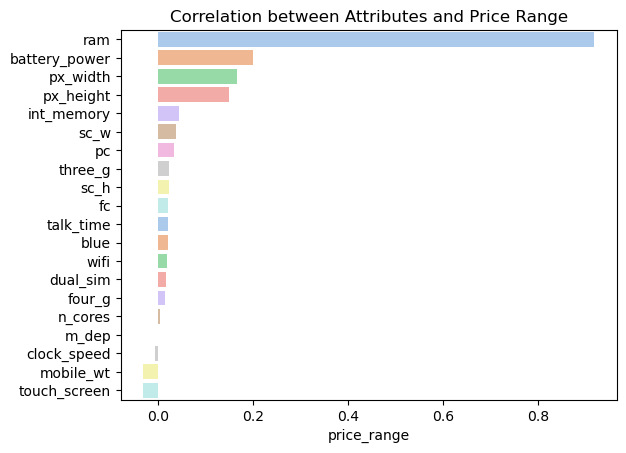

In [11]:
corr = Mobile_df.corr()
corr = corr.price_range
cr = corr.sort_values(ascending = False)[1:]
sns.barplot(x=cr, y=cr.index,palette = "pastel")
plt.title("Correlation between Attributes and Price Range")

#### Due to the correlation and the absence of the m_dep column in the test data, we delete this column

In [12]:
Mobile_df.drop('m_dep',axis=1,inplace=True)
Mobile_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,145,5,5,336,670,869,18,10,19,1,1,1,0


## Model

### Decision Tree Classifier

In [13]:
X=Mobile_df.drop(['price_range'], axis=1)
Y=Mobile_df['price_range'].values.reshape(-1,1)

In [14]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.15 , random_state=0)

In [15]:
#Grid search for Decision Tree Classifier
max_depth = np.arange(1,10,1)
min_samples_leaf = np.arange(0,50,10)
max_leaf_nodes = np.arange(10,20,1)

# set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": max_depth,
              "min_samples_leaf":min_samples_leaf,
              "max_leaf_nodes": max_leaf_nodes}

In [16]:
# Decision Tree Classifier
decision_tree_Gridsearch = DecisionTreeClassifier()
decision_tree_Gridsearch = GridSearchCV(decision_tree_Gridsearch, param_grid, cv=10)
decision_tree_Gridsearch.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_leaf_nodes': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'min_samples_leaf': array([ 0, 10, 20, 30, 40])})

In [17]:
decision_tree_Gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_leaf_nodes': 19,
 'min_samples_leaf': 10}

In [18]:
DTs = DecisionTreeClassifier(criterion='gini',
 max_depth=6,
 max_leaf_nodes=19,
 min_samples_leaf=10)


DTs= DTs.fit(x_train, y_train)

# predict the model using 'X_test'
y_pred = DTs.predict(x_test)

In [19]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.84


In [20]:
reporDTree = classification_report(y_test, y_pred, output_dict = True)
CDTree = pd.DataFrame(reporDTree).transpose()
CDTree

,precision,recall,f1-score,support
0,0.955882,0.942029,0.948905,69.00
1,0.797101,0.833333,0.814815,66.00
2,0.720000,0.729730,0.724832,74.00
3,0.886364,0.857143,0.871508,91.00
accuracy,0.840000,0.840000,0.840000,0.84
macro avg,0.839837,0.840559,0.840015,300.00
weighted avg,0.841679,0.840000,0.840657,300.00


## Random Forest Classifier

In [21]:
random_forest = RandomForestClassifier(n_estimators=50,criterion='entropy',max_features=4)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.89


In [23]:
reporDTree = classification_report(y_test, y_pred, output_dict = True)
CDTree = pd.DataFrame(reporDTree).transpose()
CDTree

,precision,recall,f1-score,support
0,0.957746,0.985507,0.971429,69.00
1,0.846154,0.833333,0.839695,66.00
2,0.816901,0.783784,0.800000,74.00
3,0.924731,0.945055,0.934783,91.00
accuracy,0.890000,0.890000,0.890000,0.89
macro avg,0.886383,0.886920,0.886476,300.00
weighted avg,0.888440,0.890000,0.889045,300.00


## SVM

In [24]:
#Support Vector Machine (SVM) Classifier
SVM = SVC()

SVM.fit(x_train,y_train)

y_pred = SVM.predict(x_test)
y_pred_train = SVM.predict(x_train)

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.96


In [26]:
reporDTree = classification_report(y_test, y_pred, output_dict = True)
CDTree = pd.DataFrame(reporDTree).transpose()
CDTree

,precision,recall,f1-score,support
0,0.971831,1.000000,0.985714,69.00
1,0.984375,0.954545,0.969231,66.00
2,0.957143,0.905405,0.930556,74.00
3,0.936842,0.978022,0.956989,91.00
accuracy,0.960000,0.960000,0.960000,0.96
macro avg,0.962548,0.959493,0.960622,300.00
weighted avg,0.960354,0.960000,0.959769,300.00


In [27]:
# Optimized SVM Classifier
svm1 = SVC(C=0.1,decision_function_shape='ovo',gamma='auto',kernel='linear',random_state=1)
svm1.fit(x_train,y_train)
y_pred = svm1.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9733333333333334


In [28]:
y_pred_train = svm1.predict(x_train)

print("Accuracy:",metrics.accuracy_score(y_train,y_pred_train))

Accuracy: 0.991764705882353


# Reading the test dataset

In [29]:
Mobile_df_test = pd.read_csv(r'C:\Users\Sharare\Desktop\poroje 2\test.csv')
Mobile_df_test = pd.DataFrame(Mobile_df_test)
Mobile_df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [30]:
Mobile_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

### Dropping unnecessary columns from the test dataset

In [31]:
Mobile_df_test.drop(['id','m_dep'],axis=1,inplace=True)
Mobile_df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,171,2,12,38,832,2509,15,11,6,0,1,0


In [32]:
Mobile_df_test.loc[Mobile_df_test['px_height']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
420,986,0,2.8,0,0,1,26,80,8,9,0,1214,1316,7,5,8,1,0,0
819,1992,1,1.3,1,8,1,43,153,5,15,0,883,2179,7,6,20,1,1,0


In [33]:
Mobile_df_test.drop(index=[420,819],inplace=True)
Mobile_df_test.reset_index(inplace=True)

In [34]:
# Removing rows with 'px_height' as 0
Mobile_df_test.drop('index',axis=1,inplace=True)

In [35]:
Mobile_df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,1700,1,1.9,0,0,1,54,170,7,17,644,913,2121,14,8,15,1,1,0
994,609,0,1.8,1,0,0,13,186,4,2,1152,1632,1933,8,1,19,0,1,1
995,1185,0,1.4,0,1,1,8,80,1,12,477,825,1223,5,0,14,1,0,0
996,1533,1,0.5,1,0,0,50,171,2,12,38,832,2509,15,11,6,0,1,0


# Predicting 'price_range' using the optimized SVM Classifier on the test dataset

In [36]:
Mobile_df_test['price_range'] = svm1.predict(Mobile_df_test)
Mobile_df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,191,5,12,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,108,6,18,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,1700,1,1.9,0,0,1,54,170,7,17,644,913,2121,14,8,15,1,1,0,2
994,609,0,1.8,1,0,0,13,186,4,2,1152,1632,1933,8,1,19,0,1,1,1
995,1185,0,1.4,0,1,1,8,80,1,12,477,825,1223,5,0,14,1,0,0,0
996,1533,1,0.5,1,0,0,50,171,2,12,38,832,2509,15,11,6,0,1,0,2


# DONE